**시계열 자료.**

<br>

## Todo List (큰 주제로 보면)

<br>

- 연도별 추세 확인? 시각화로. --> X001-2 에서 진행해봄.
- 연도별 자살률 확인?
    - 이 자살률을 나이/세대/성별 로 구분해서 시각화.

In [44]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [45]:
# data loading
df = pd.read_csv('C:\\Users\\user\\Desktop\\todoData\\fixed_suicide_3.csv')

In [46]:
df.head()

,Unnamed: 0,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI_for_year,gdp_for_year_($),gdp_per_capita_($),generation
0,0,Germany,1990,male,75+ years,1516,1717700,88.26,Germany1990,0.801,"1,764,967,948,917",23546,G.I. Generation
1,1,Germany,1990,male,55-74 years,2406,6593100,36.49,Germany1990,0.801,"1,764,967,948,917",23546,G.I. Generation
2,2,Germany,1990,male,35-54 years,3302,11127100,29.68,Germany1990,0.801,"1,764,967,948,917",23546,Silent
3,3,Germany,1990,female,75+ years,1174,3978800,29.51,Germany1990,0.801,"1,764,967,948,917",23546,G.I. Generation
4,4,Germany,1990,male,25-34 years,1488,6721200,22.14,Germany1990,0.801,"1,764,967,948,917",23546,Boomers


In [47]:
# 불필요한 컬럼 삭제
dropList = ['Unnamed: 0', 'country-year']
df = df.drop(columns=dropList)

In [48]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'HDI_for_year', 'gdp_for_year_($)',
       'gdp_per_capita_($)', 'generation'],
      dtype='object')

In [49]:
# index 재설정 은 하면 안될거같다.
# df.set_index('year', inplace=True)

In [50]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI_for_year,gdp_for_year_($),gdp_per_capita_($),generation
0,Germany,1990,male,75+ years,1516,1717700,88.26,0.801,"1,764,967,948,917",23546,G.I. Generation
1,Germany,1990,male,55-74 years,2406,6593100,36.49,0.801,"1,764,967,948,917",23546,G.I. Generation
2,Germany,1990,male,35-54 years,3302,11127100,29.68,0.801,"1,764,967,948,917",23546,Silent
3,Germany,1990,female,75+ years,1174,3978800,29.51,0.801,"1,764,967,948,917",23546,G.I. Generation
4,Germany,1990,male,25-34 years,1488,6721200,22.14,0.801,"1,764,967,948,917",23546,Boomers


In [51]:
# 나라별로 split
GerDF = df[df['country'] == 'Germany']
JapDF = df[df['country'] == 'Japan']
KorDF = df[df['country'] == 'Republic of Korea']

In [52]:
GerDF.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI_for_year,gdp_for_year_($),gdp_per_capita_($),generation
0,Germany,1990,male,75+ years,1516,1717700,88.26,0.801,"1,764,967,948,917",23546,G.I. Generation
1,Germany,1990,male,55-74 years,2406,6593100,36.49,0.801,"1,764,967,948,917",23546,G.I. Generation
2,Germany,1990,male,35-54 years,3302,11127100,29.68,0.801,"1,764,967,948,917",23546,Silent
3,Germany,1990,female,75+ years,1174,3978800,29.51,0.801,"1,764,967,948,917",23546,G.I. Generation
4,Germany,1990,male,25-34 years,1488,6721200,22.14,0.801,"1,764,967,948,917",23546,Boomers


split을 괜히했나 싶기도 하고

In [56]:
corrList = ['suicides_no', 'population', 'suicides/100k pop', 'HDI_for_year', 'gdp_per_capita_($)']
df[corrList].corr()

,suicides_no,population,suicides/100k pop,HDI_for_year,gdp_per_capita_($)
suicides_no,1.000000,0.696447,0.387184,0.151740,0.268703
population,0.696447,1.000000,-0.111540,0.200411,0.430052
suicides/100k pop,0.387184,-0.111540,1.000000,0.072377,-0.035444
HDI_for_year,0.151740,0.200411,0.072377,1.000000,0.798088
gdp_per_capita_($),0.268703,0.430052,-0.035444,0.798088,1.000000


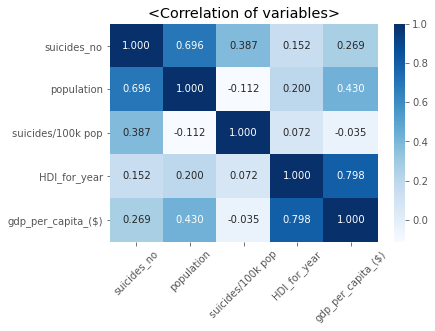

In [59]:
fig = sns.heatmap(data = df[corrList].corr(), annot = True, fmt='.3f', cmap='Blues')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
plt.title('<Correlation of variables>')
plt.show()

***연도별 자살률 확인해야한다***

In [58]:
KorDF['year']

684     1985
685     1985
686     1985
687     1985
688     1985
        ... 
1051    2015
1052    2015
1053    2015
1054    2015
1055    2015
Name: year, Length: 372, dtype: int64

<AxesSubplot:xlabel='year', ylabel='suicides_no'>

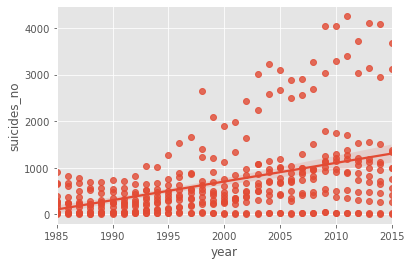

In [60]:
sns.regplot(x=KorDF['year'], y=KorDF['suicides_no'], fit_reg=True)

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

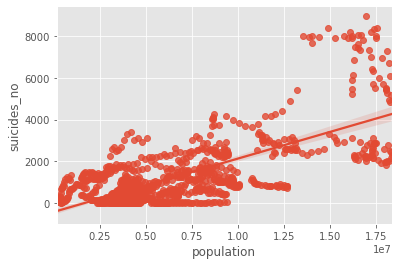

In [61]:
sns.regplot(x=df['population'], y=df['suicides_no'], fit_reg=True)